## 데이터 불러오기

In [14]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/heart.csv')
df=df.dropna() #결측치 제거

In [15]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


## 범주형 변수 One_hot_encoding 하기

In [16]:
df=pd.get_dummies(df,columns=['ChestPain','Sex','Thal','AHD'], drop_first=True) # drop_first -> 범주가 K개인 경우 K-1개만 살리는 옵션
df

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Sex_1,Thal_normal,Thal_reversable,AHD_Yes
0,63,145,233,1,2,150,0,2.3,3,0.0,0,0,1,1,0,0,0
1,67,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,1,0,1
2,67,120,229,0,2,129,1,2.6,2,2.0,0,0,0,1,0,1,1
3,37,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,1,0,0
4,41,130,204,0,2,172,0,1.4,1,0.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,0,0,123,1,0.2,2,0.0,0,0,0,0,0,1,1
298,45,110,264,0,0,132,0,1.2,2,0.0,0,0,1,1,0,1,1
299,68,144,193,1,0,141,0,3.4,2,2.0,0,0,0,1,0,1,1
300,57,130,131,0,0,115,1,1.2,2,1.0,0,0,0,1,0,1,1


In [17]:
y = df.pop('AHD_Yes')
X = df

## 데이터 나누기

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 16)
(60, 16)
(237,)
(60,)


## 수치데이터 정규화하기

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## 모델 만들기

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu',input_dim=X_train_std.shape[1]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
    

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1088      
                                                                 
 dense_19 (Dense)            (None, 8)                 520       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [41]:
history = model.fit(X_train_std, y_train, epochs=100, validation_data = (X_test_std, y_test), verbose = 1)

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 0.7202 - accuracy: 0.5359 - val_loss: 0.6772 - val_accuracy: 0.5667
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.6465 - accuracy: 0.5992 - val_loss: 0.6246 - val_accuracy: 0.6333
Epoch 3/100
8/8 [==============================] - 0s 22ms/step - loss: 0.5913 - accuracy: 0.6751 - val_loss: 0.5821 - val_accuracy: 0.6667
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5426 - accuracy: 0.7595 - val_loss: 0.5478 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5071 - accuracy: 0.7890 - val_loss: 0.5201 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4759 - accuracy: 0.8059 - val_loss: 0.4971 - val_accuracy: 0.7833
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4495 - accuracy: 0.8312 - val_loss: 0.4803 - val_accuracy: 0.7833
Epoch 8/100
8/8 [===

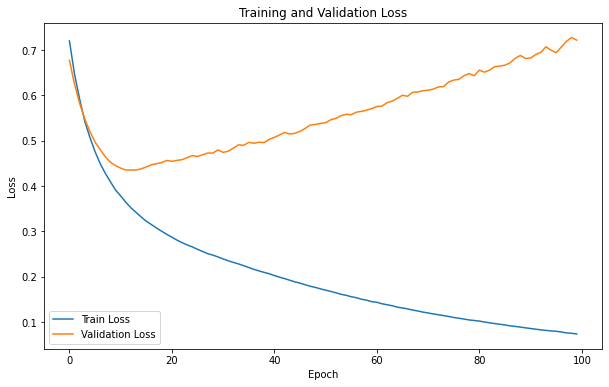

In [42]:
import matplotlib.pyplot as plt

# 학습 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 오버피팅 방지

Keras에서는 EarlyStopping 콜백을 사용하여 monitor='val_loss'로 설정하여 검증 데이터의 손실 값을 모니터링합니다.   
patience는 성능이 개선되지 않더라도 얼마나 기다릴지를 지정합니다. 
이를 통해 검증데이터의 로스값이 더이상 개선되지 않는다면 학습을 중단하여 모델이 오버피팅 되는것을 방지할 수 있습니다.

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.7368 - accuracy: 0.4684 - val_loss: 0.7102 - val_accuracy: 0.5667
Epoch 2/100
8/8 [==============================] - 0s 19ms/step - loss: 0.6680 - accuracy: 0.5696 - val_loss: 0.6631 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 25ms/step - loss: 0.6133 - accuracy: 0.6920 - val_loss: 0.6236 - val_accuracy: 0.6833
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.5601 - accuracy: 0.7848 - val_loss: 0.5878 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5119 - accuracy: 0.8312 - val_loss: 0.5571 - val_accuracy: 0.7333
Epoch 6/100
8/8 [==============================] - 0s 25ms/step - loss: 0.4735 - accuracy: 0.8565 - val_loss: 0.5295 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 0.4379 - accuracy: 0.8608 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

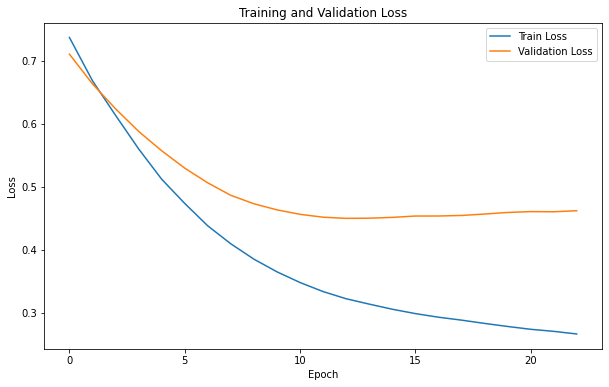

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# 모델 생성
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu',input_dim=X_train_std.shape[1]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
    
# 모델 컴파일
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train_std, y_train, epochs=100, validation_data = (X_test_std, y_test), callbacks = [early_stopping])

# 학습 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
